In [456]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plot
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from collections import namedtuple
import datetime

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/heart.csv
input/o2Saturation.csv


In [457]:
o2saturation = pd.read_csv('input/o2Saturation.csv')
heart = pd.read_csv('input/heart.csv')

In [458]:
from sklearn.model_selection import train_test_split
y = heart.output
X = heart.drop("output", axis=1)

print(o2saturation)
best_accuracies = []
X_train, X_test, y_train, y_test = train_test_split(X,y)

DataContainer = namedtuple('DataContainer', ['X', 'y', 'X_train', 'X_test', 'y_train', 'y_test'])
data = DataContainer(X, y, X_train, X_test, y_train, y_test)

      98.6
0     98.6
1     98.6
2     98.6
3     98.1
4     97.5
...    ...
3580  98.6
3581  98.6
3582  98.6
3583  98.6
3584  98.6

[3585 rows x 1 columns]


In [459]:
def print_graph(range, accuracies, idx_max, max_val, title, file_name):
    plot.plot(range, accuracies, "-", marker="o")
    plot.title(f"{title} Best Run k={idx_max + 2}, Accuracy={max_val}\n")
    plot.legend("Initial points with Noise", loc="upper right")
    plot.xlabel("Parameter Value")
    plot.ylabel("Accuracy")
    plot.grid(False)
    plot.savefig(f"outputs/{file_name}{datetime.datetime.now():%Y%m%d-%H%M%S}.png", format="png")
    plot.show()

def print_report(idx_max, classReport, confMatrix):
    print(f"Best k={idx_max + 2}")
    print("Best Classification Report:")
    print(classReport[idx_max])
    print("Best Confusion Matrix:")
    print(confMatrix[idx_max])
    
def model_fit_train(model_class, param_name, i, data, accuracies, classReport, confMatrix):
    model = model_class(**{param_name: i})
    model.fit(data.X_train, data.y_train)
    predictions = model.predict(data.X_test)
    accuracies.append(cross_val_score(model, data.X, data.y, cv=10).mean())
    classReport.append(classification_report(data.y_test, predictions, zero_division=0))
    confMatrix.append(confusion_matrix(data.y_test, predictions))

    
def evaluate_model(k_range, model_class, param_name, data, model_name, iter):
    i = 2
    accuracies = []
    classReport = []
    confMatrix = []

    if not iter:
        while i < k_range:
            model_fit_train(model_class, param_name, i, data, accuracies, classReport, confMatrix)
            i += 1
    # else: -- Not working, this case was meant for kernel specifically
    #     for i in k_range:
    #         model_fit_train(model_class, param_name, i, data, accuracies, classReport, confMatrix)
        
    max_val = max(accuracies)
    best_accuracies.append(max_val)
    idx_max = accuracies.index(max_val)
    
    title = f"{model_name} Best Run"
    file_name = f"{model_name.lower()}points"
    print_graph(range(2,k_range), accuracies, idx_max, max_val, title=title, file_name=filename)
    print_report(idx_max, classReport, confMatrix)

K-Nearest Neighbors (KNN)

In [460]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=200)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [461]:
y_model = model.predict(X_test)

In [462]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_model)

0.47368421052631576

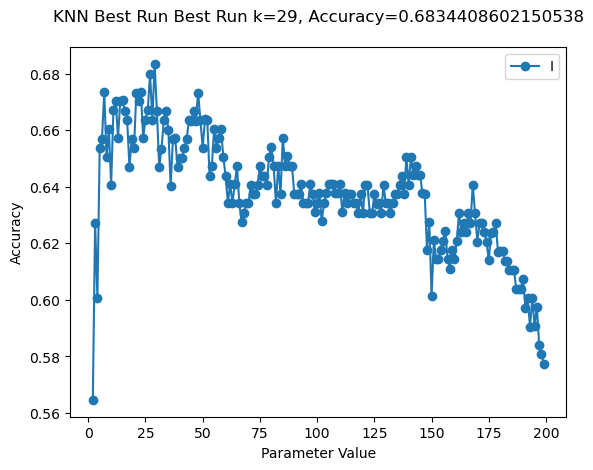

Best k=29
Best Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.55      0.68        40
           1       0.65      0.92      0.76        36

    accuracy                           0.72        76
   macro avg       0.76      0.73      0.72        76
weighted avg       0.77      0.72      0.72        76

Best Confusion Matrix:
[[22 18]
 [ 3 33]]


In [463]:
#TEST KNN: WHICH VALUE OF K PERFROMS BEST
evaluate_model(200, KNeighborsClassifier, param_name="n_neighbors", data=data, model_name="KNN", iter=False)

Decision Tree

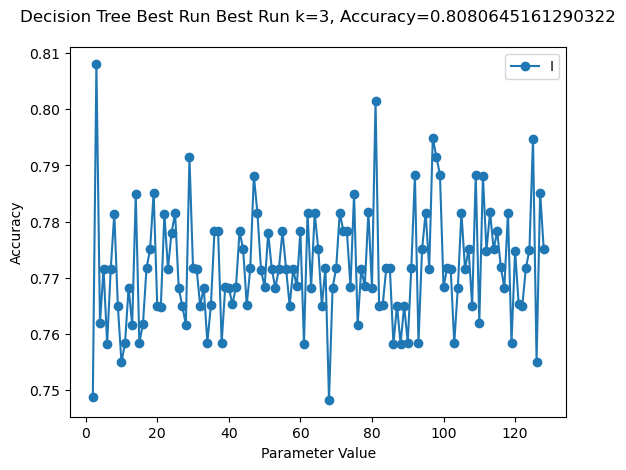

Best k=3
Best Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        40
           1       0.72      0.78      0.75        36

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76

Best Confusion Matrix:
[[29 11]
 [ 8 28]]


In [464]:
from sklearn.tree import DecisionTreeClassifier

evaluate_model(129, DecisionTreeClassifier, param_name="max_depth", data=data, model_name="Decision Tree", iter=False)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

evaluate_model(2049, RandomForestClassifier, param_name="n_estimators", data=data, model_name="Random Forest", iter=False)

Support Vector Machine

In [ ]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
classReport = []
confMatrix = []

for i in kernels:
    svcModel = SVC(kernel = i)
    svcModel.fit(X_train, y_train)
    predictions = svcModel.predict(data.X_test)
    
    accuracies.append(cross_val_score(svcModel, data.X, data.y, cv=10).mean())
    classReport.append(classification_report(data.y_test, predictions, zero_division=0))
    confMatrix.append(confusion_matrix(data.y_test, predictions))

max_val = max(accuracies)
best_accuracies.append(max_val)
idx_max = accuracies.index(max_val)

plot.plot(kernels, accuracies, "-", marker="o")
plot.title(f"SVC Best Run k={idx_max + 2}, Accuracy={max_val}\n")
plot.legend(["Initial Points with Noise"])
plot.savefig(f"outputs/svmpoints{datetime.datetime.now()}.png", format="png")
plot.show()

Cross Validation

In [ ]:
scores = []
names = []

#TEST KNN: Cross validation
knnModel = KNeighborsClassifier(n_neighbors=128)
scores.append(cross_val_score(knnModel, X, y, cv=10))
names.append("KNN")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores[0].mean(), scores[0].std()))

In [ ]:
# TEST Tree: Cross 
model = DecisionTreeClassifier(max_depth=3)
scores.append(cross_val_score(model, X, y, cv=10))
names.append("Decision Tree")

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores[1].mean(), scores[1].std()))

In [ ]:
#TEST Forest: Cross validation
model = RandomForestClassifier(n_estimators=128, max_depth=2)
scores.append(cross_val_score(model, X, y, cv=10))
names.append("Random Forest")

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores[2].mean(), scores[2].std()))





In [ ]:
#TEST SVM: Cross validation
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
scores.append(cross_val_score(model, X, y, cv=10))
names.append("SVM")

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores[3].mean(), scores[3].std()))

In [ ]:
scores_mean = []
scores_std = []

for i in scores:
    scores_mean.append(i.mean())
    scores_std.append(i.std())


# Create the plot
fig, ax = plot.subplots(figsize=(8, 4))

# Create a gradient background
x = np.linspace(1, 0, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
z = X + Y  # Create a gradient that increases along both axes

# Normalize Z to the range [0, 1]
z = (z - z.min()) / (z.max() - z.min())
for i in range(0,4):
    plot.plot(scores_mean[i], scores_std[i], "o")
# Set the background gradient
ax.imshow(z, aspect='auto', extent=ax.get_xlim() + ax.get_ylim(), origin='lower', cmap='coolwarm', alpha=0.7)

plot.title(f"Cross Validation Analysis")
plot.xlabel("Mean Accuracy")
plot.ylabel("Standard Deviation")
plot.legend(names)
plot.savefig(f"outputs/crossvalpoints{datetime.datetime.now()}.png", format="png")
plot.show()